## 6.1. Introduction

In [8]:
%matplotlib inline
import networkx as nx

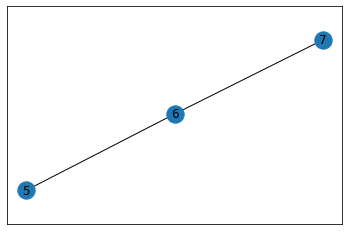

In [9]:
graph = nx.Graph()
graph.add_edge(5, 6)
graph.add_edge(6, 7)

nx.draw_networkx(graph)

## 6.2. Algorithms for Graph

In [10]:
import random

In [11]:
def generate_graph(n, m):
    graph_data = [[0] * n for i in range(n)]
    edge_set = set()
    while len(edge_set) < m:
        i, j = random.sample(range(n), 2)
        if i > j: i, j = j, i
        edge_set.add((i, j))
        graph_data[i][j] = graph_data[j][i] = 1
    return graph_data, edge_set

In [19]:
random.seed(6)
node_num, edge_num = 16, 20
my_graph, edge_set = generate_graph(node_num, edge_num)
edge_set

{(0, 2),
 (0, 4),
 (0, 8),
 (1, 9),
 (2, 5),
 (2, 7),
 (2, 13),
 (3, 12),
 (3, 15),
 (5, 11),
 (5, 13),
 (6, 8),
 (6, 11),
 (6, 13),
 (7, 8),
 (7, 11),
 (8, 10),
 (12, 13),
 (12, 15),
 (13, 14)}

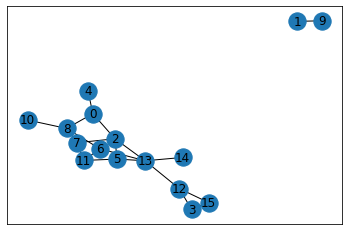

In [20]:
graph = nx.Graph()
for edge in edge_set:
    graph.add_edge(*edge)

nx.draw_networkx(graph)

In [28]:
from collections import deque

def breath_first_search(start :int, am :list):
    q = deque([start])
    visited = set([start])

    while True:
        if not q: break
        now = q.popleft()
        for node, is_adj in enumerate(am[now]):
            if not is_adj: continue
            if node in visited: continue
            q.append(node)
            visited.add(node)
    
    return visited


def depth_first_search(start :int, am :list):
    q = [start]
    visited = set([start])

    while True:
        if not q: break
        now = q.pop()
        for node, is_adj in enumerate(am[now]):
            if not is_adj: continue
            if node in visited: continue
            q.append(node)
            visited.add(node)
    
    return visited

In [31]:
print(breath_first_search(10, my_graph))
print(depth_first_search(10, my_graph))

{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}
{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}


In [43]:
import math
import heapq

def dijkstra(start, am):
    """Search the shortest path and distance for nodes excluding start.
    Args:
        - start : start node index
        - am : adjacent matrix (2d list)
    Return:
        a list of shortest distance of nodes
    """
    # Set INF to all shortest distance
    distance_list = [math.inf] * len(am)
    # Set 0 to start node distance
    distance_list[start] = 0
    # List of nodes confirmed shortest dist
    done_list = []
    # Heap to determine the next node
    wait_heap = []
    # Create the tuple of (distance from start, node)
    for i, d in enumerate(distance_list):
        heapq.heappush(wait_heap, (d, i))
    # Continue to process until heap is empty
    while wait_heap:
        _, n = heapq.heappop(wait_heap)
        if n in done_list: continue
        # Confirmed the distance from start
        done_list.append(n)
        # Processes for the nodes adjucenting to i
        for j, x in enumerate(am[n]):
            if x == 1 and j not in done_list:
                # Relaxation
                d = min(distance_list[j], distance_list[n] + x)
                distance_list[j] = d
                # Add d to heap as the shortest distance to d
                heapq.heappush(wait_heap, (d, j))
    return distance_list

In [42]:
dijkstra(10, my_graph)

[2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5]